basic data exploration

In [9]:
# View the first few rows of the dataframe
df

# Get information about columns, data types, and missing values
df.info()

# Generate descriptive statistics
df.describe()

# Select only numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

13

Missing Values Analysis

<Axes: >

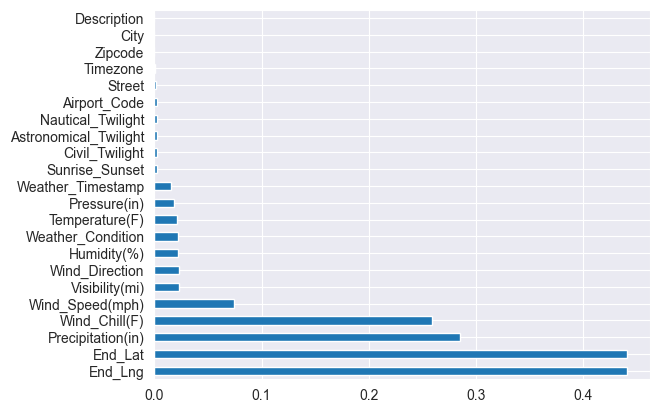

In [14]:
# Calculate percentage of missing values in each column
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

# Check the type of the result
type(missing_percentages)

# Format as a percentage with 2 decimal places in a dataframe
(missing_percentages * 100).round(2).to_frame(name='Missing %')

# Plot missing values as a horizontal bar chart
missing_percentages[missing_percentages != 0].plot(kind='barh')


City analysis

City
American Fork-Pleasant Grove    1
Waldoboro                       1
Kinsley                         1
Killona                         1
Jeanerette                      1
                               ..
Rapid River                     1
Cat Spring                      1
Glenwood City                   1
Downing                         1
Marfa                           1
Name: count, Length: 1023, dtype: int64

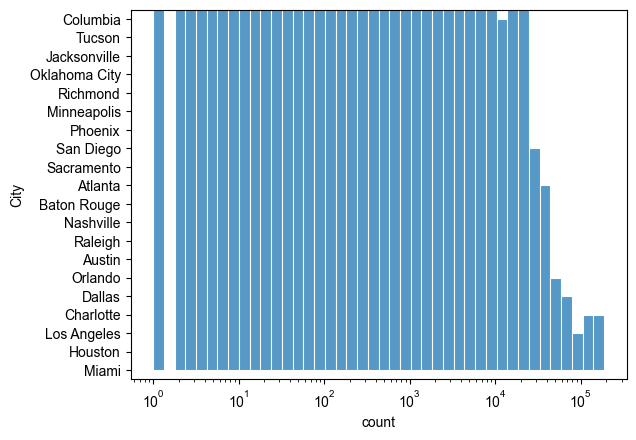

In [11]:
# View the City column
df.City

# Get unique cities
cities = df.City.unique()
len(cities)

# Count accidents by city
cities_by_accident = df.City.value_counts()
cities_by_accident

# Show top 20 cities by accident count
cities_by_accident[:20]

# Check type of the result
type(cities_by_accident)

# Plot top 20 cities as horizontal bar chart
cities_by_accident[:20].plot(kind='barh')

# Set Seaborn style for better visualization
sns.set_style("darkgrid")

# Create histogram with logarithmic scale
sns.histplot(cities_by_accident, log_scale=True)

# Find cities with only one accident
cities_by_accident[cities_by_accident == 1]


time based analysis

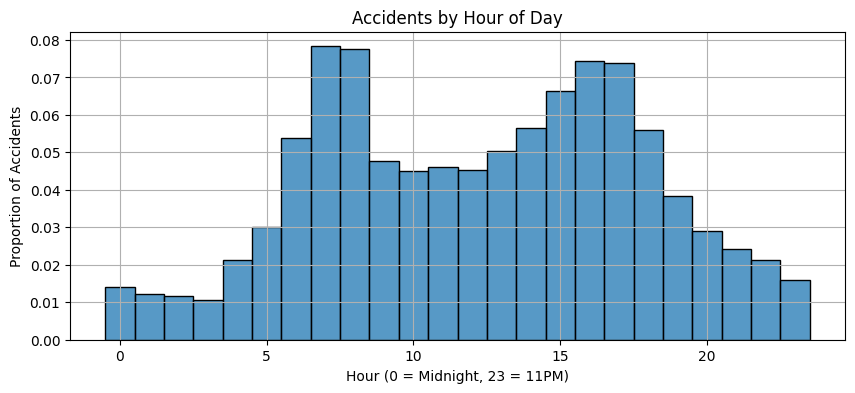

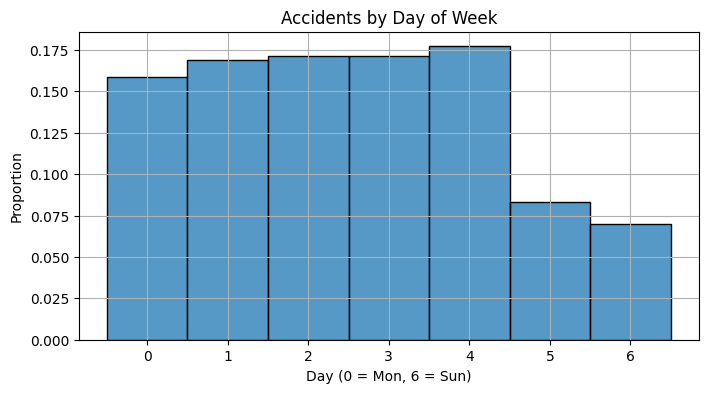

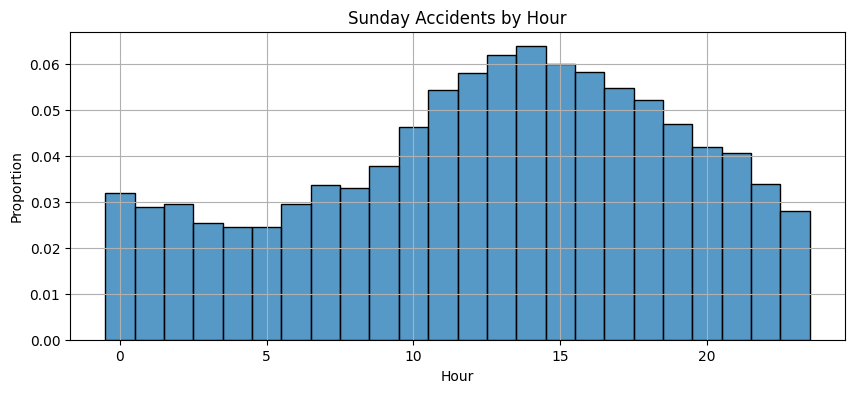

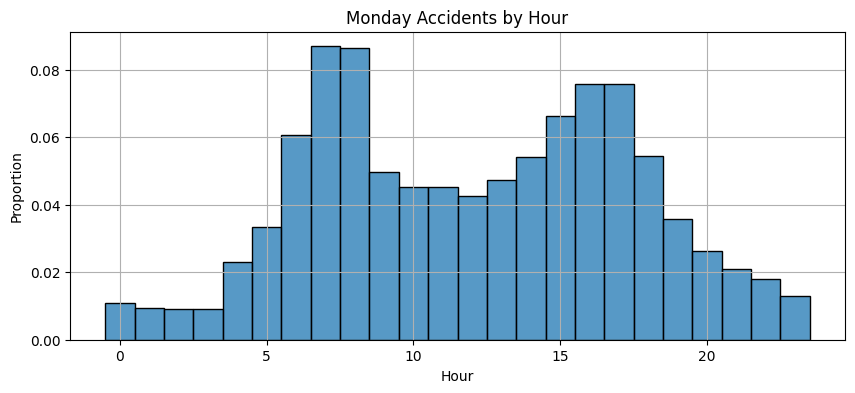

C:\Users\91940\AppData\Local\Temp\ipykernel_21120\299030079.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Source'] = df_2019['Source'].str.lower().str.strip()


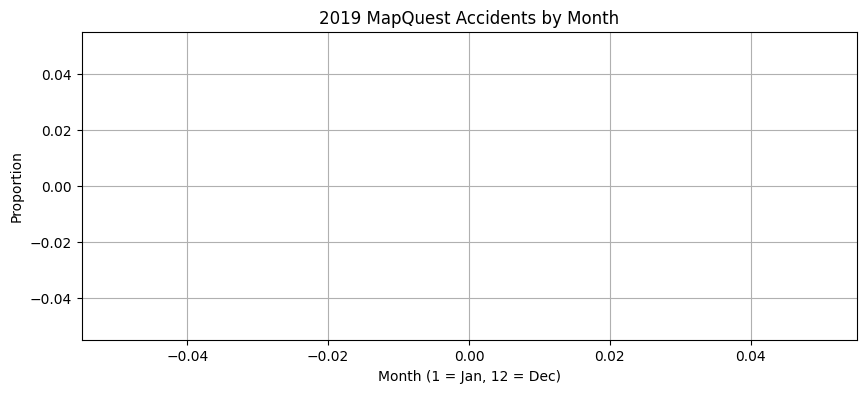

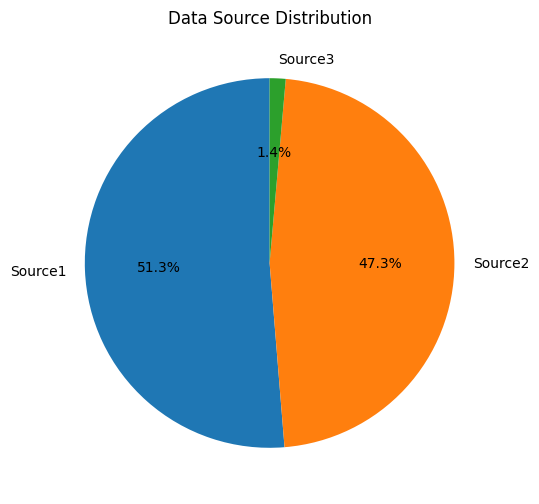

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load only required columns (saves memory)
data_file = r"C:\Users\91940\Desktop\US_Accidents_March23.csv"
df = pd.read_csv(data_file, usecols=['Start_Time', 'Source'])

# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop invalid Start_Time values in-place to save memory
df.dropna(subset=['Start_Time'], inplace=True)

# 1️⃣ Accidents by Hour
plt.figure(figsize=(10, 4))
sns.histplot(df.Start_Time.dt.hour, bins=24, stat="density", discrete=True)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour (0 = Midnight, 23 = 11PM)")
plt.ylabel("Proportion of Accidents")
plt.grid(True)
plt.show()

# 2️⃣ Accidents by Day of the Week
plt.figure(figsize=(8, 4))
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, stat="density", discrete=True)
plt.title("Accidents by Day of Week")
plt.xlabel("Day (0 = Mon, 6 = Sun)")
plt.ylabel("Proportion")
plt.grid(True)
plt.show()

# 3️⃣ Sunday Accidents by Hour
sundays = df[df.Start_Time.dt.dayofweek == 6]
plt.figure(figsize=(10, 4))
sns.histplot(sundays.Start_Time.dt.hour, bins=24, stat="density", discrete=True)
plt.title("Sunday Accidents by Hour")
plt.xlabel("Hour")
plt.ylabel("Proportion")
plt.grid(True)
plt.show()

# 4️⃣ Monday Accidents by Hour
mondays = df[df.Start_Time.dt.dayofweek == 0]
plt.figure(figsize=(10, 4))
sns.histplot(mondays.Start_Time.dt.hour, bins=24, stat="density", discrete=True)
plt.title("Monday Accidents by Hour")
plt.xlabel("Hour")
plt.ylabel("Proportion")
plt.grid(True)
plt.show()

# 5️⃣ MapQuest 2019 Accidents by Month
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019['Source'] = df_2019['Source'].str.lower().str.strip()
df_2019_mq = df_2019[df_2019['Source'] == 'mapquest']

plt.figure(figsize=(10, 4))
sns.histplot(df_2019_mq.Start_Time.dt.month, bins=12, stat="density", discrete=True)
plt.title("2019 MapQuest Accidents by Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Proportion")
plt.grid(True)
plt.show()

# 6️⃣ Data Source Pie Chart
plt.figure(figsize=(6, 6))
df.Source.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Data Source Distribution")
plt.ylabel("")
plt.show()


geo analysis

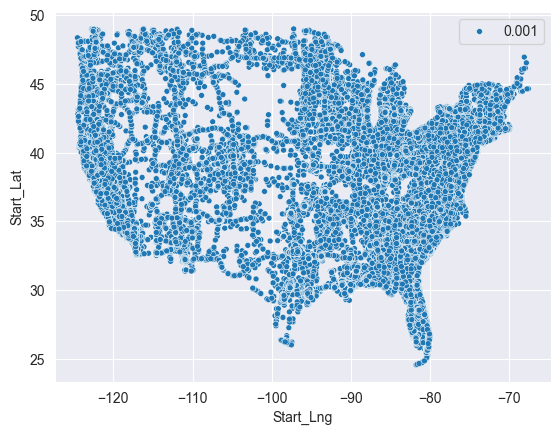

In [13]:
# View latitude and longitude columns
df.Start_Lat
df.Start_Lng

# Create a sample for more efficient plotting
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

# Create interactive map with heat map overlay
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map  # Display the map


In [19]:
print(df_2019.Source.unique())


['Source2' 'Source3' 'Source1']
